# MATH7502 PROJECT: Gaussian Weighted Least Squares

### Alex White -- 43218307 

This notebook will demonstrate Gaussian Weighted Least Squares (GWLS). Gaussian Weighted Least Squares is an extension of the least squares method where each observation is assigned a weight based on its variance. Unlike ordinary least squares, which assumes constant variance, GWLS can be applied in cases where observations have differing variances. 

This method is widely used in smoothing, regression, and curve fitting, improving model accuracy when non-uniform variance is present. A good example of this is in financial data analysis, where there is high volatility of asset prices.

This notebook will work through a few examples of where least squared is used and try to show its advantages. 


## Key Concepts


In ordinary least squares (OLS), we aim to minimise the sum of squared errors:

$$
E = \| y - X \beta \|^2
$$

where $ X $ is the design matrix, $ y $ is the response vector, and $ \beta $ is the vector of coefficients. This approach, however, assumes that the variance of the errors is constant across all observations. Where the variance in errors is not constant,
this assumption no longer holds, and thus OLS may provide a biased or inefficient solution.

In GWLS, a weighting matrix $ W $ is used to account for the varying variance across the observations. The error function then becomes:

$$
E = (y - X \beta)^T W^{-1} (y - X \beta)
$$

The solution to this problem is:

$$
\hat{\beta}_{GWLS} = (X^T W X)^{-1} X^T W y
$$

where $ W $ is a diagonal matrix of weights, with higher weights corresponding to observations with lower variance, and vice versa.

This allows GWLS to provide a more accurate solution when dealing with data where the error variance is not uniform.

## Multivariate Gaussian Distribution

The multivariate Gaussian distribution generalises the normal distribution to multiple dimensions. It is characterised by a mean vector $ \mu $ and a covariance matrix $ V $, which represents the correlations between variables. The probability density function is thus defined as:

$$
f(x) = \frac{1}{\sqrt{(2\pi)^k |V|}} \exp\left(-\frac{1}{2} (x - \mu)^T V^{-1} (x - \mu)\right)
$$

This function is critical in constructing the weighting matrix for GWLS.


Now let's see a demonstration of gaussian weighted least squares and compare it to OLS.

In [1]:
# Import Packages
using Random, LinearAlgebra, Statistics, Plots, Distributions

First we need to generate some synthetic data. We want data with some noise, that we may be able to apply smooothing to with the GWLS. 

In [2]:
# Set random seed for reproducibility
Random.seed!(1)

# Generate synthetic data for regression
n = 100
X = hcat(ones(n), randn(n))  # Design matrix
true_beta = [3.0, 2.5]       # True coefficients

# Generate noisy observations
y = X * true_beta + 0.5 * randn(n)

# Display the first few rows of the data
(X[1:5, :], y[1:5])

([1.0 0.06193274031408013; 1.0 0.2784058141640002; … ; 1.0 0.04665938957338174; 1.0 1.0857940215432762], [3.6324885435304752, 3.5699193950689385, 1.5671589992271708, 3.5327707385857803, 4.802005782897979])

Next, we need to create the random variances for each obsercation, and create the matrix of variances. This will be used to differentiate between the least squares methods. 

In [9]:
# Generate different variances for each observation
v = abs.(randn(n))  # Variances for each observation
W = Diagonal(1.0 ./ v)  # Weights matrix

# OLS solution
ols_beta = inv(X' * X) * X' * y

# GWLS solution
gwls_beta = inv(X' * W * X) * X' * W * y

# Visualisation of OLS vs GWLS
scatter(X[:, 2], y, label="Data", title="Comparison of OLS and GWLS")
plot!(X[:, 2], X * ols_beta, label="OLS Fit", linewidth=2, color=:blue)
plot!(X[:, 2], X * gwls_beta, label="GWLS Fit", linewidth=2, linestyle=:dash, color=:red)

# Save the plot
savefig("ols_vs_gwls.png")

"/Users/alexwhite/Desktop/Masters of Data Science/MATH7502/ols_vs_gwls.png"

As shown in the chart above, by assigning weights to observations based on their variances, GWLS adjusts the regression line to fit more accurately to data points 
with lower variance, while down-weighting points with higher variance. The randomly generated data doesn't have too much noise, which is why the models are relatively similar. 


## Cholesky Factorisation for Gaussian Computations

Cholesky factorisation is a technique to decompose a positive-definite matrix $ V $ into the product of a lower triangular matrix $ L $ and its transpose:

$$
V = LL^T
$$

This factorisation is particularly useful when generating correlated Gaussian random variables. If $ Z $ is a vector of independent standard normal variables, then the correlated variables $ X $ can be generated as:

$$
X = \mu + LZ
$$

This method is computationally efficient and ensures that the covariance matrix of the generated data matches $ V $.


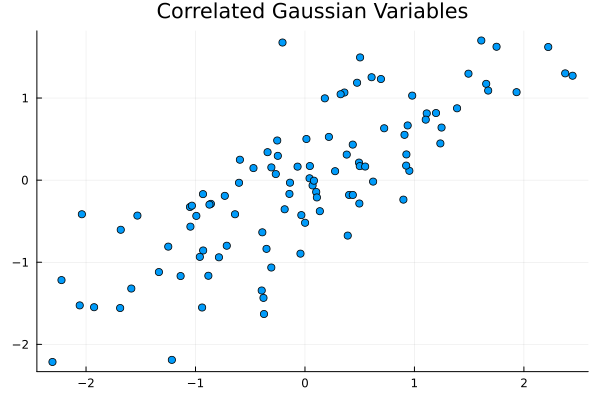

In [8]:
# Example of Cholesky decomposition
mu = [0.0, 0.0]
V = [1.0 0.8; 0.8 1.0]  # Covariance matrix
L = cholesky(V).L

# Example of generating correlated Gaussian variables using the Cholesky decomposition
function generate_correlated_gaussian(n, mu, V)
    L = cholesky(V).L
    Z = randn(length(mu), n)
    return mu .+ L * Z
end

# Generate correlated Gaussian variables
X_correlated = generate_correlated_gaussian(100, mu, V)

# Display the first few rows of the data
X_correlated[:, 1:5]

# Visualisation of correlated Gaussian variables
scatter(X_correlated[1, :], X_correlated[2, :], label="Data", title="Correlated Gaussian Variables", legend=false)


## Conclusion
As shown in the methods above, Gaussian Weighted Least Squares has several applications in data science. It's particularly useful for improving accuracy and efficiency of models through smoothing and curve-fitting.